
# **ML Project Part 2: Regression**


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
### For scaling 
from sklearn.preprocessing import StandardScaler


### for the model fiiting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### For normalization
from sklearn.preprocessing import Normalizer

from scipy.stats import pearsonr 
import re



<a id="fHome"></a>

# **Table of contects**

<a id="DFA"></a>

[1. Data Definitions](#fDFA)

<a id="Reading_Data"></a>

[2. Reading Data](#fReading_Data)


<a id="EDA"></a>

[3. Explotary Data Analyses](#fEDA)


<a id="FDM"></a>

[4. Fitting Regression Models](#fFDM)


<a id="Models_Into_Actions"></a>

[5. Models into Actions](#fModels_Into_Actions)


<a id="fDFA"></a>

# **1. Data Definition** 
###### 1.1 CRIM 
per capita crime rate by town

###### 1.2 ZN 
proportion of residential land zoned for lots over 25,000 sq.ft.
###### 1.3 INDUS 
 proportion of non-retail business acres per town
###### 1.4 CHAS 
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
###### 1.5 NOX 
nitric oxides concentration (parts per 10 million)
###### 1.6 RM 
average number of rooms per dwelling
###### 1.7 AGE
proportion of owner-occupied units built prior to 1940
###### 1.8 DIS 
weighted distances to ﬁve Boston employment centers
###### 1.9 RAD 
index of accessibility to radial highways
###### 1.10 TAX 
full-value property-tax rate per 10,000 dollars
###### 1.11 PTRATION 
pupil-teacher ratio by town
###### 1.12 B-1000 
1000(Bk−0.63)2 where Bk is the proportion of blacks by town
###### 1.13 LSTAT 
 % lower status of the population
###### 1.14 MEDV
Median value of owner-occupied homes in 1,000 dollars



 <a id="Home"></a>


[Return Home](#fHome)

# **2. Reading Data**

<a id="fReading_Data"></a>

In [60]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B - 1000', 'LSTAT', 'MEDV']
Housing_Data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
Housing_Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B - 1000,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


 <a id="Home"></a>


[Return Home](#fHome)

# **3. Explotary Data Analyses**

<a id="fEDA"></a>

#### 3.1 Quick Check for Missing Data 

In [61]:
def Initial_missing_check(df):
    '''
    Takes df
    Checks nulls as % from the total column 
    '''
    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False) 
        total = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] 

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(f'Total and Percentage of NaN:\n {missing_data}')
    else: 
        print('No NaN found.')

In [62]:
Initial_missing_check(Housing_Data)

No NaN found.


#### 3.2 Correlation Matrix

Correlation Matrix : A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table represents the correlation between two variables. The correlation coefficient is a statistical measure that describes the extent to which two variables change together. It ranges from -1 to 1, where:

##### 1 indicates a perfect positive correlation: as one variable increases, the other variable increases proportionally.
##### -1 indicates a perfect negative correlation: as one variable increases, the other variable decreases proportionally.
##### 0 indicates no correlation: changes in one variable do not predict changes in the other variable.

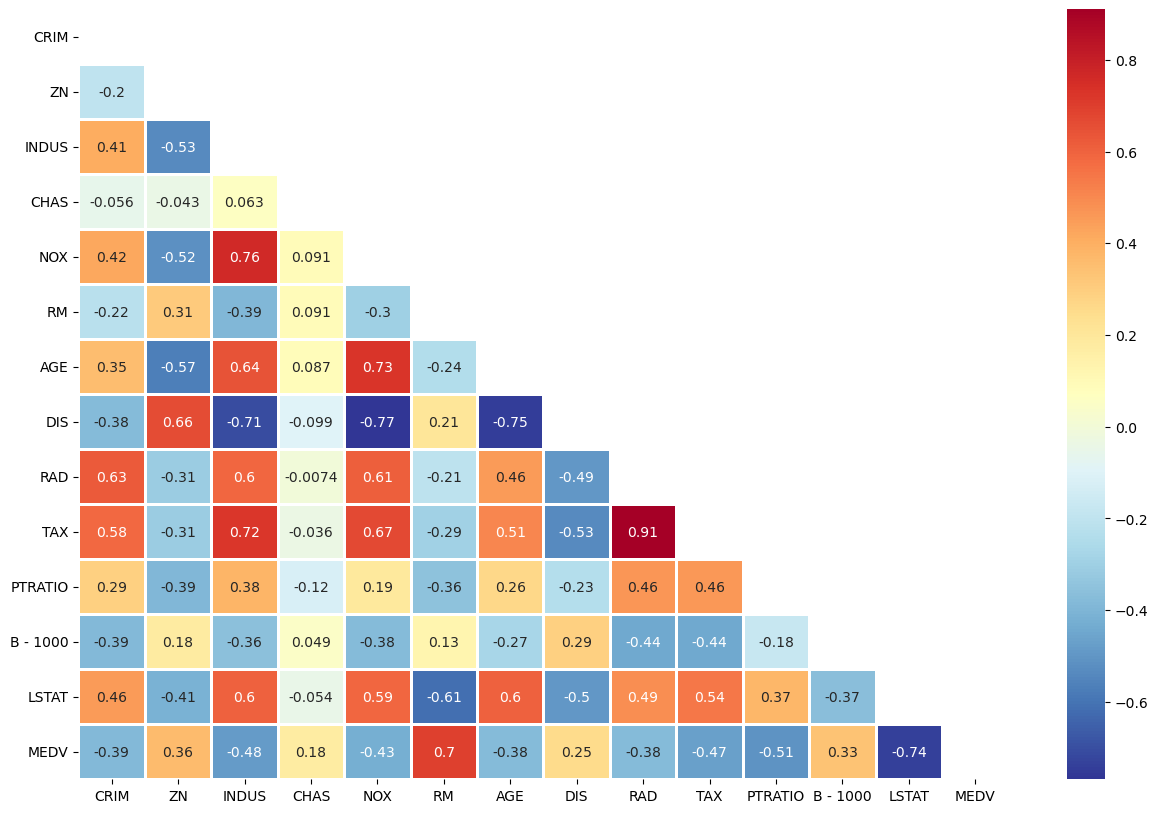

In [104]:
plt.figure(figsize=(15,10))
sns.heatmap(data=Housing_Data.corr(), mask=np.triu(Housing_Data.corr()), annot=True, cmap='RdYlBu_r',
           linewidth=1, linecolor='white')
plt.show()

#### 3.3 Corrleation Plots

In [107]:
def correlation_plots(df,y_column,categorical_column): 
    
    '''''
    selecting the numeric columns in a data frame and visualize their dsitribution plots accordingly
    
    
    '''''
    

    
    ### selecting numeric columns only to be plotted s
    numeric_columns = df.select_dtypes(include=['number'])
    
    ### creating subplots for each column distribution
    
    
    for i, column in enumerate(numeric_columns):

        lm = sns.lmplot(x=column, y=y_column, data=df, hue=categorical_column, palette="Set1", height=6, aspect=1.5, scatter_kws={'s': 50})


    return lm

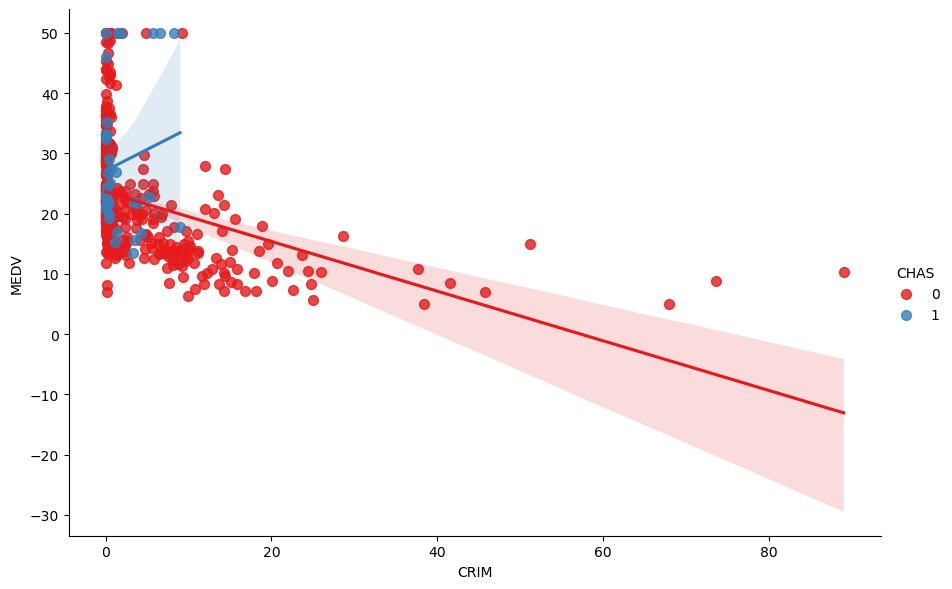

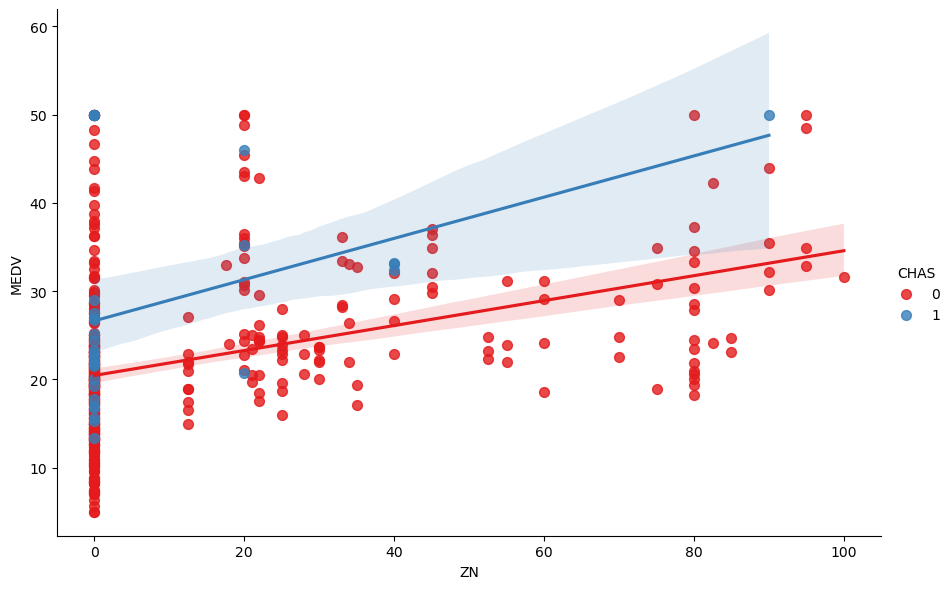

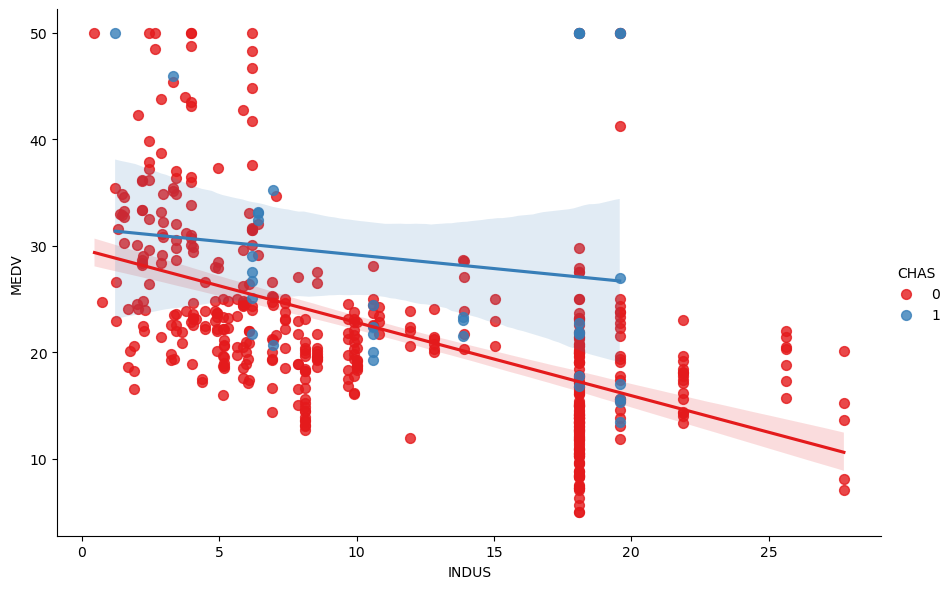

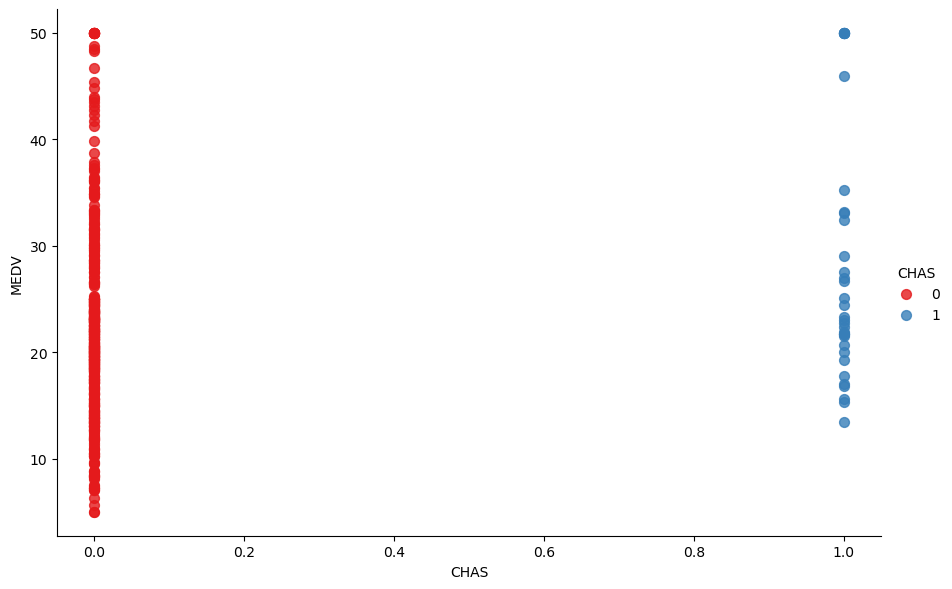

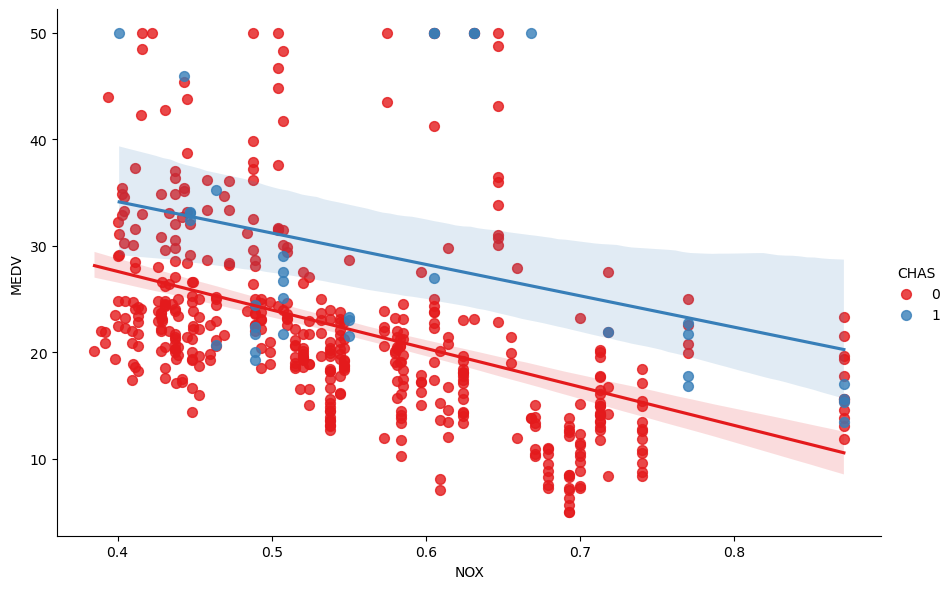

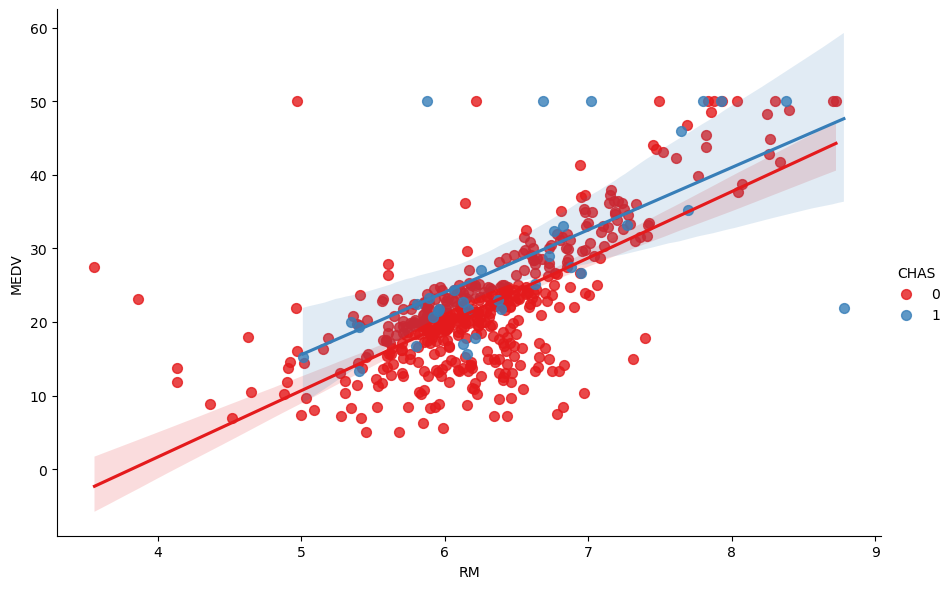

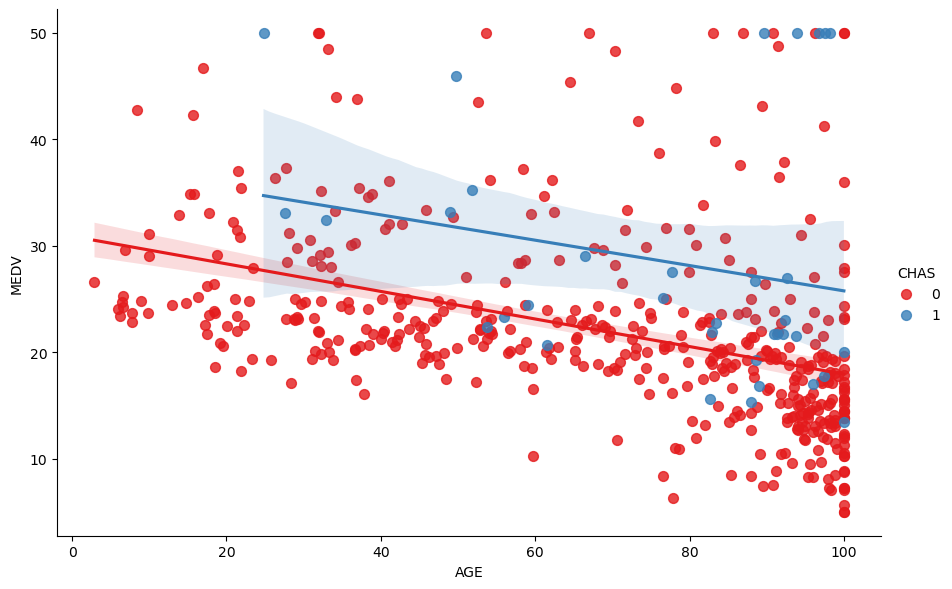

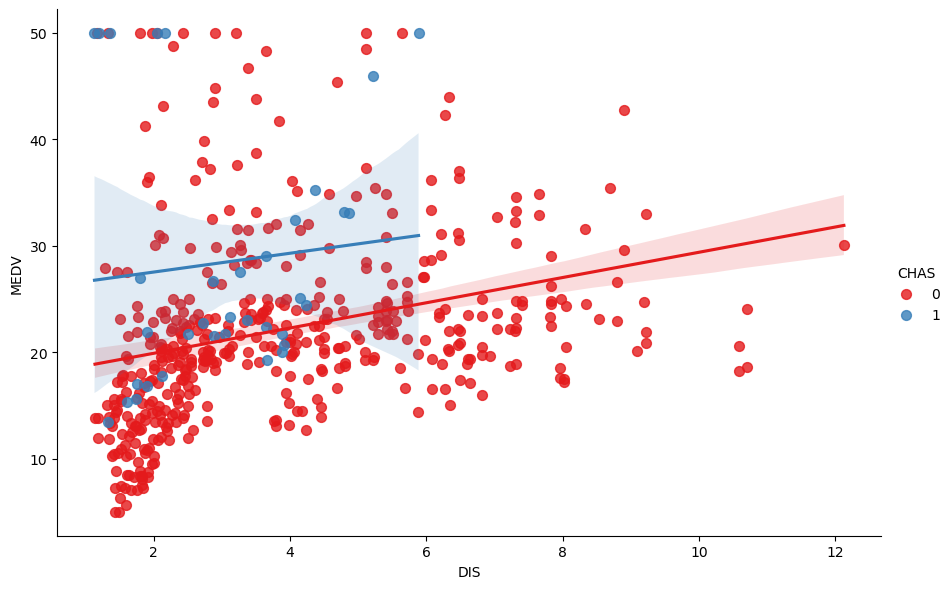

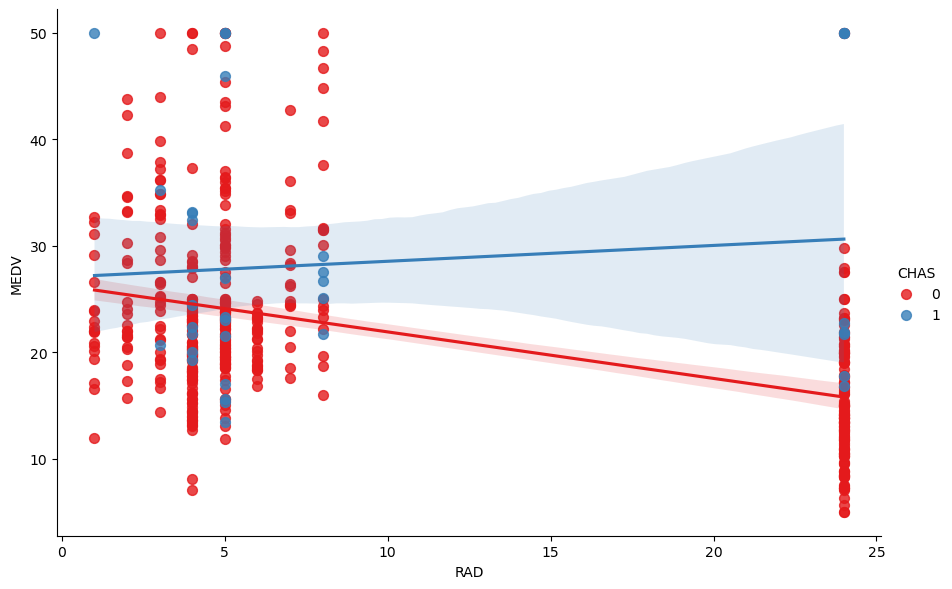

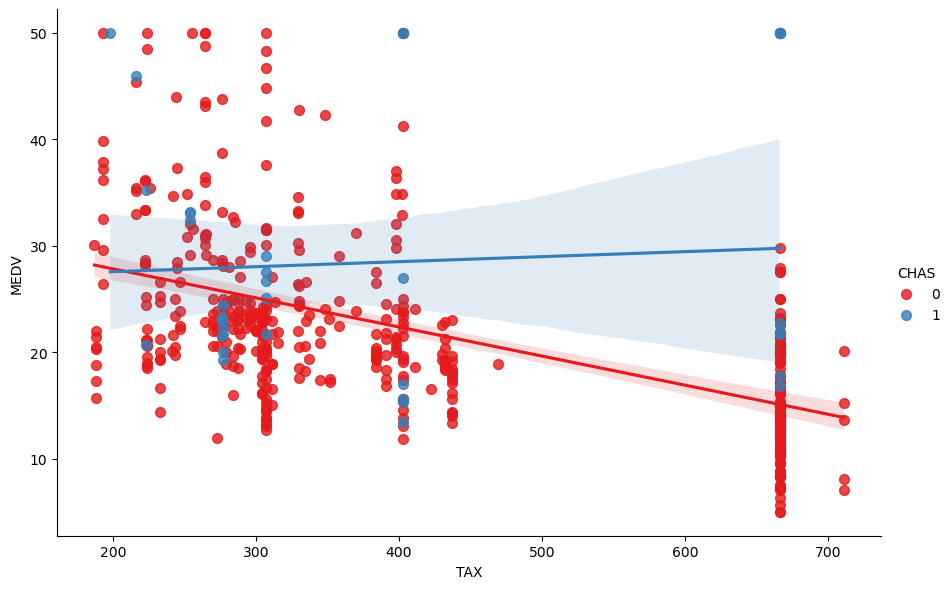

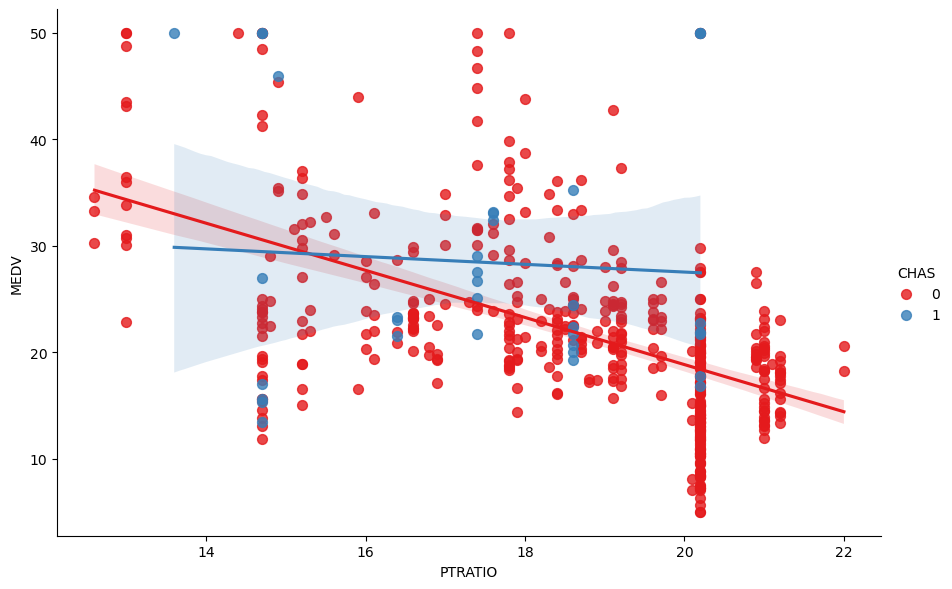

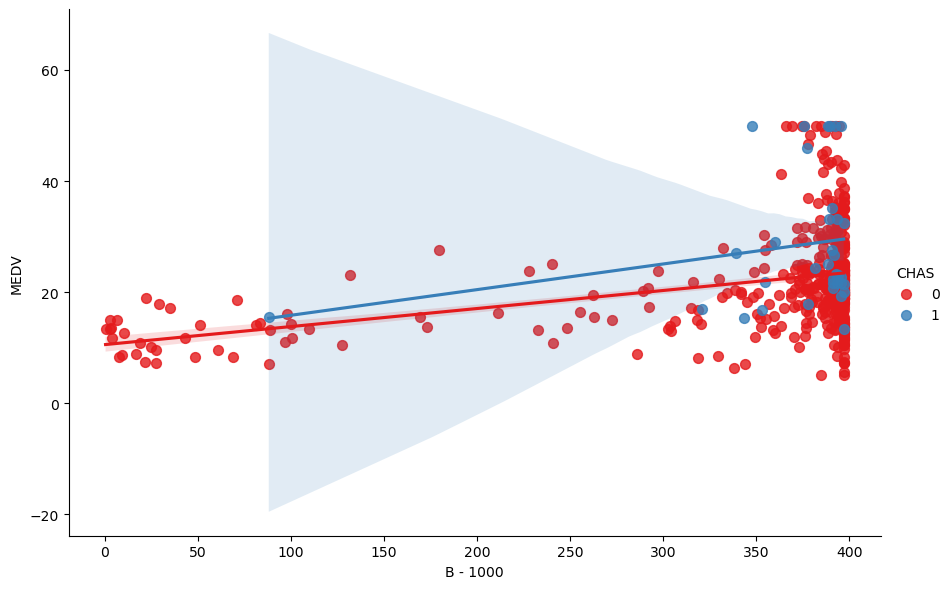

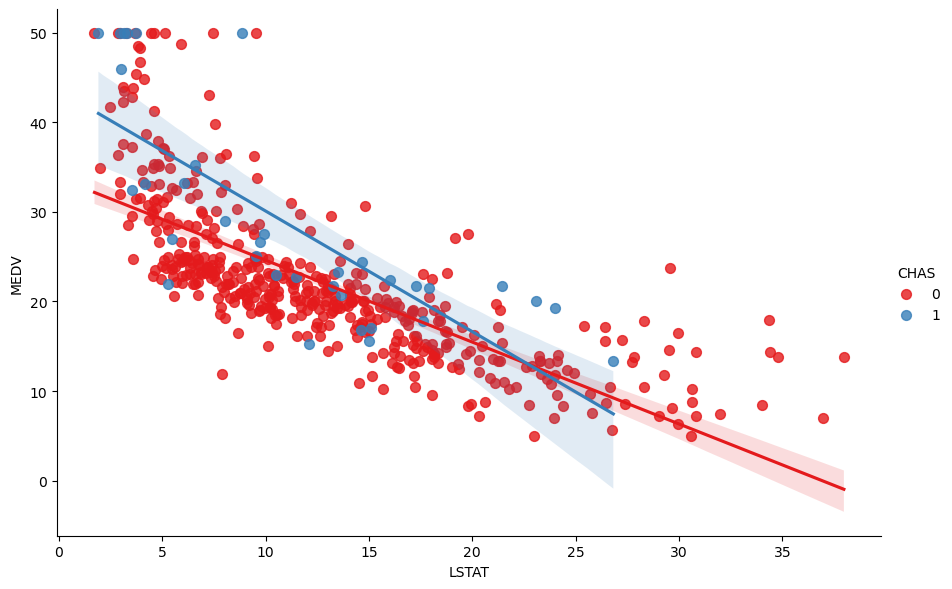

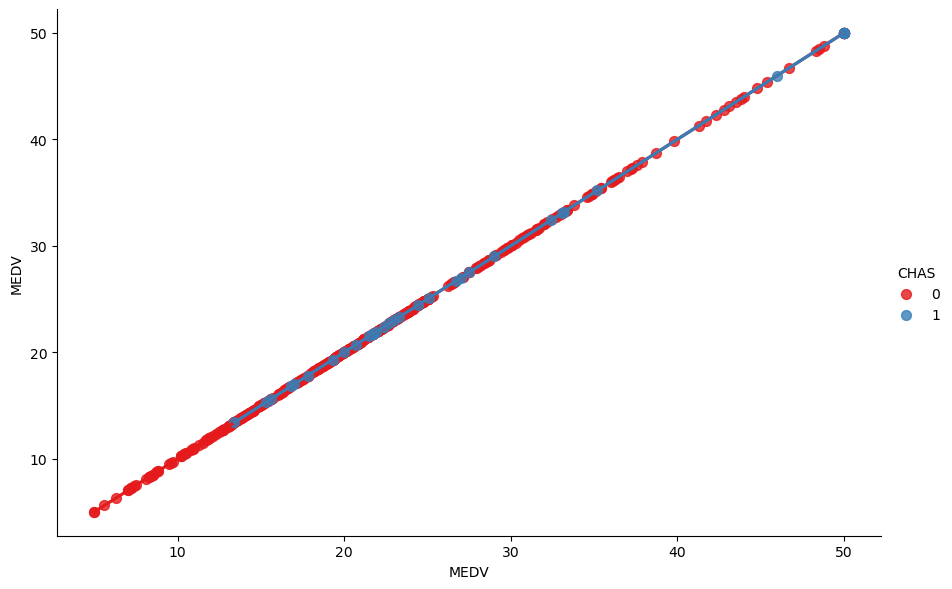

In [106]:
correlation_plots(Housing_Data,"MEDV","CHAS")

 <a id="Home"></a>


[Return Home](#fHome)

#### 3.4 Methods for detecting outliers


Boxplot Method: A boxplot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset. It provides a summary of the key statistical measures and visualizes the spread and skewness of the data.

Boxplot components: 
1. The box represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). It contains the middle 50% of the data.
2. Whiskers : indicates the data points that are outside the IQR 
3. Outliers : Any data points that are byond (before or after) the Whiskers 

In [65]:
def Boxplots(df): 
    
    '''''
    selecting the numeric columns in a data frame and visualize accordingly'''''
    
    
    ### selecting numeric columns only to be plotted Boxplots 
    numeric_columns = df.select_dtypes(include=['number'])
    
    ### creating subplots for each column distribution
    
    for i, column in enumerate(numeric_columns):
        column_name = numeric_columns.columns[i]
        sns.boxplot(x=df[column], data=df)
        plt.title(f'Box plot of: {column_name}')
        plt.show()


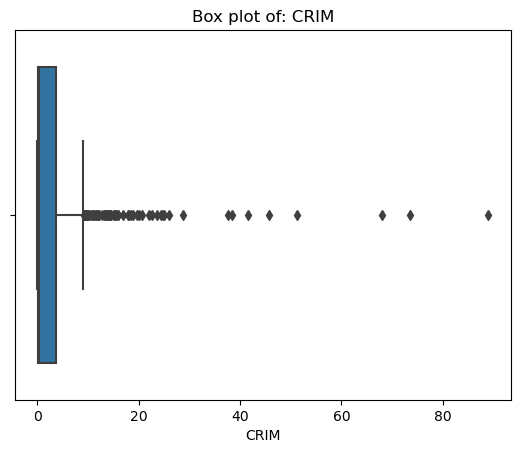

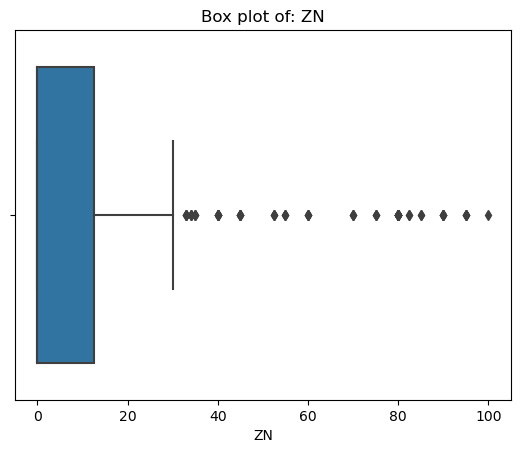

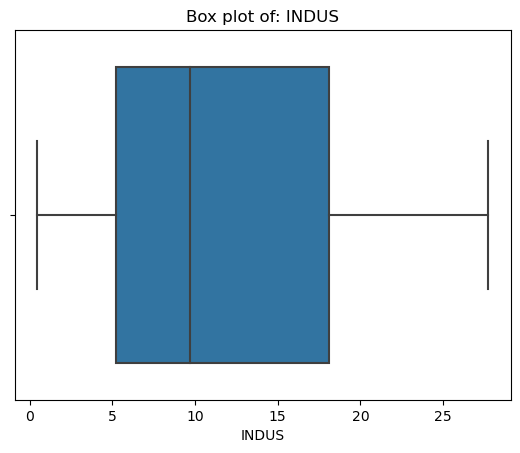

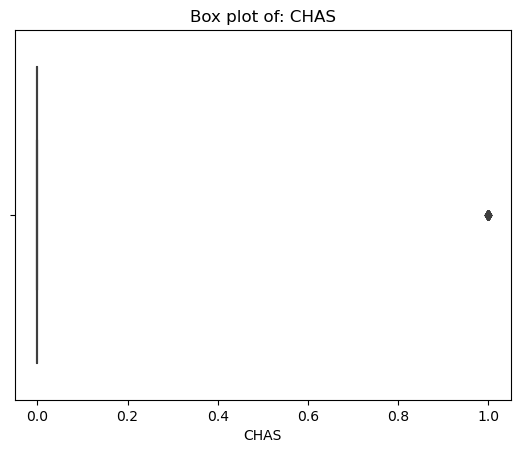

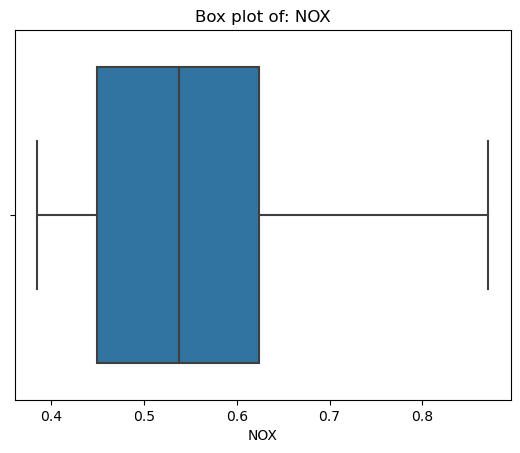

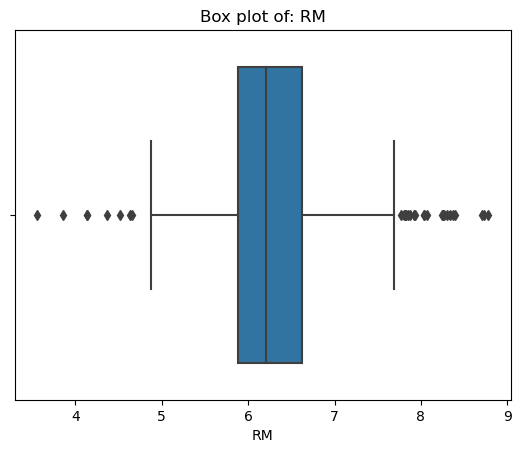

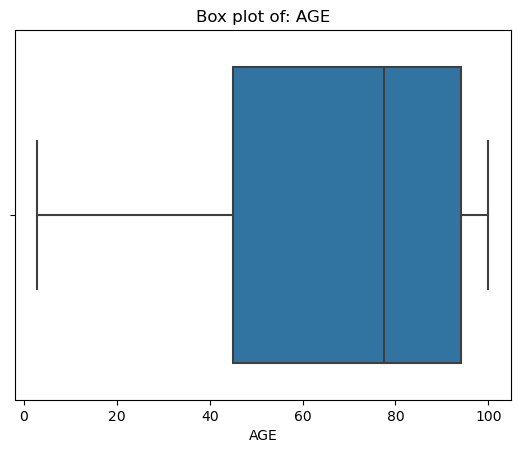

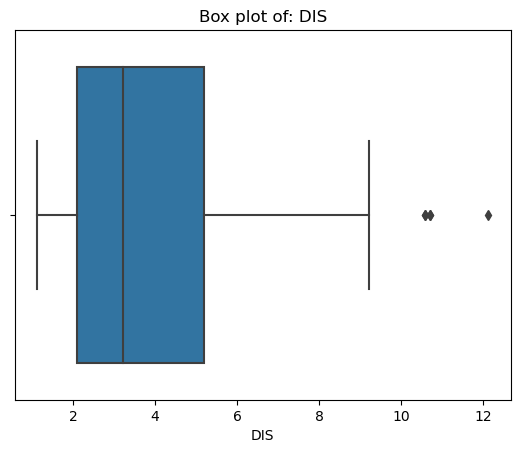

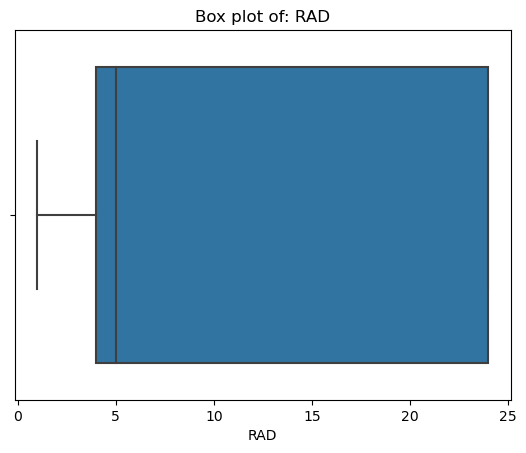

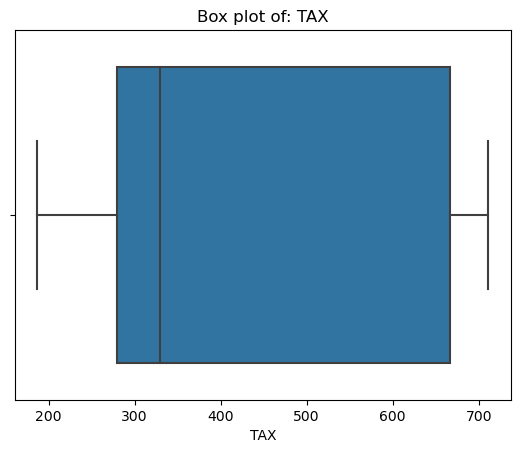

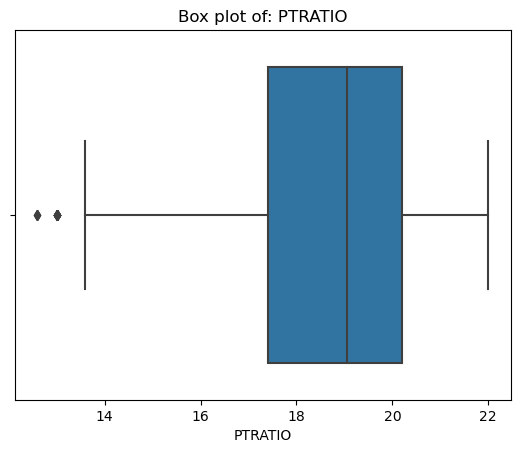

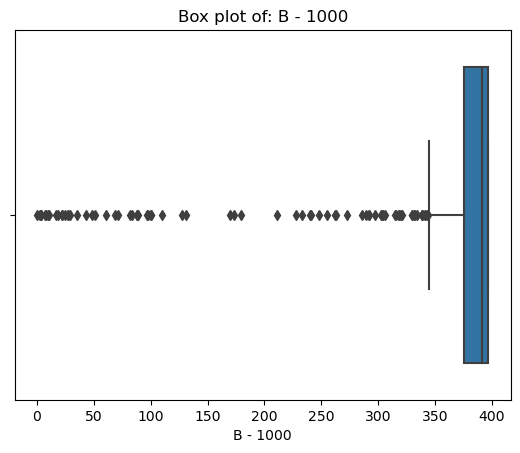

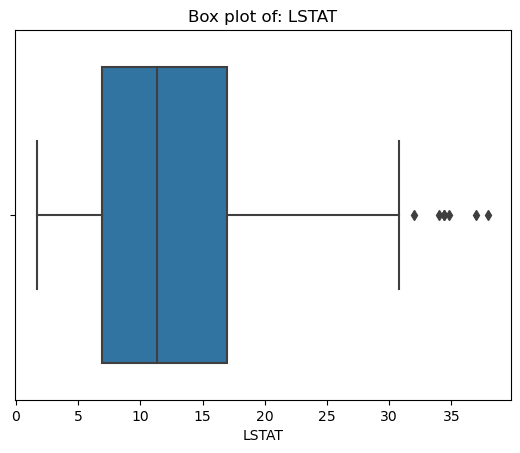

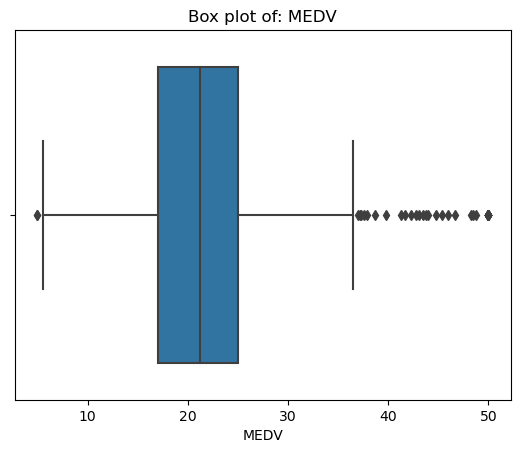

In [66]:
Boxplots(Housing_Data)

###### Methods for determing whether the columns need scaling

 <a id="Home"></a>


[Return Home](#fHome)

#### 3.5 Detecting Data Columns' Distributions

In [67]:
def Distplot(df): 
    
    '''''
    selecting the numeric columns in a data frame and visualize their dsitribution plots accordingly'''''
    

    
    ### selecting numeric columns only to be plotted s
    numeric_columns = df.select_dtypes(include=['number'])
    
    ### creating subplots for each column distribution
    
    
    for i, column in enumerate(numeric_columns):
        column_name = numeric_columns.columns[i]
        sns.distplot(df[column])
        plt.title(f'distribution plot of: {column_name}')
        plt.show()

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


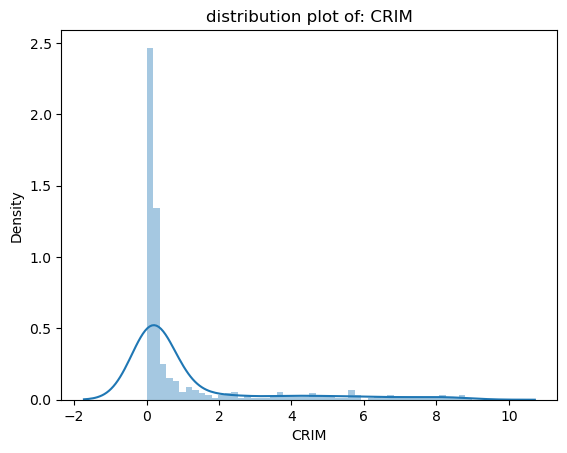

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


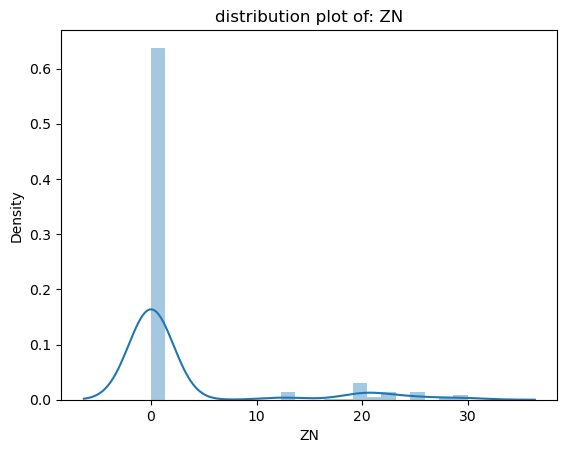

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


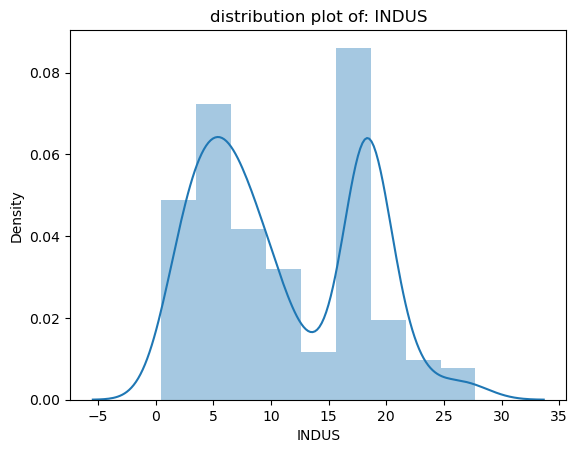

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


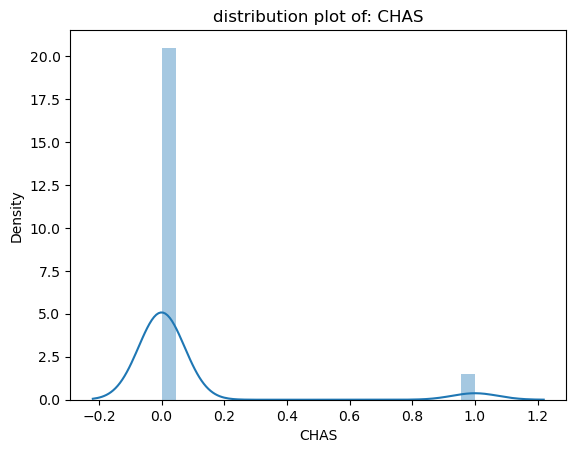

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


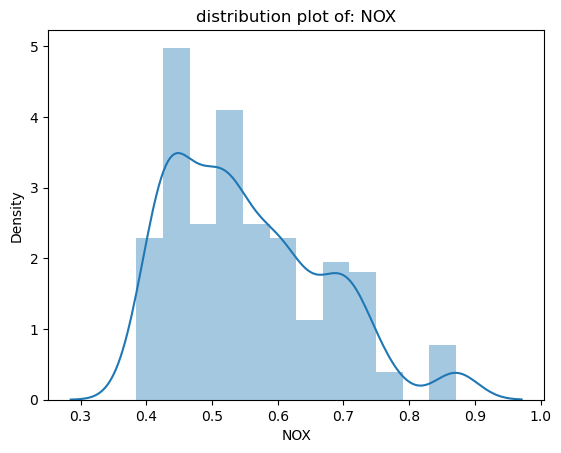

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


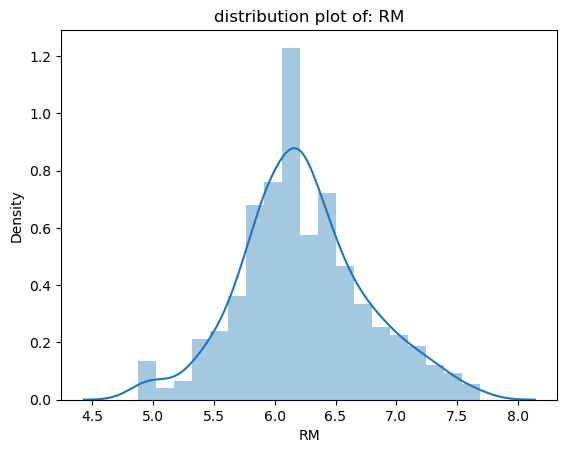

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


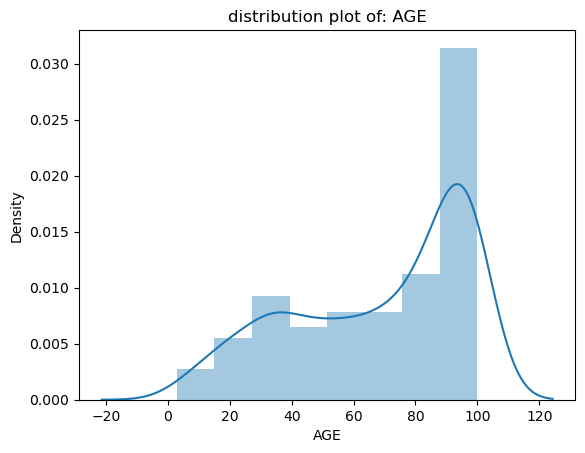

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


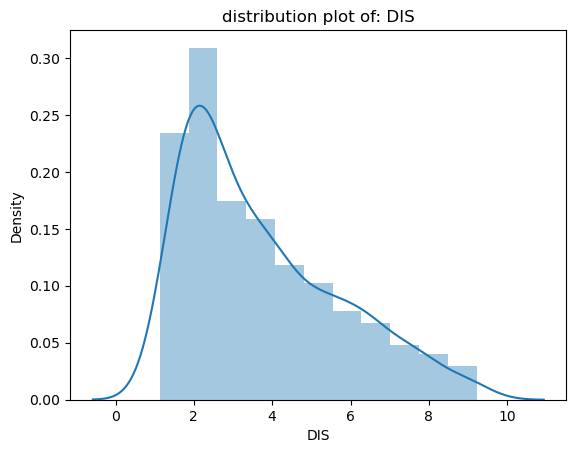

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


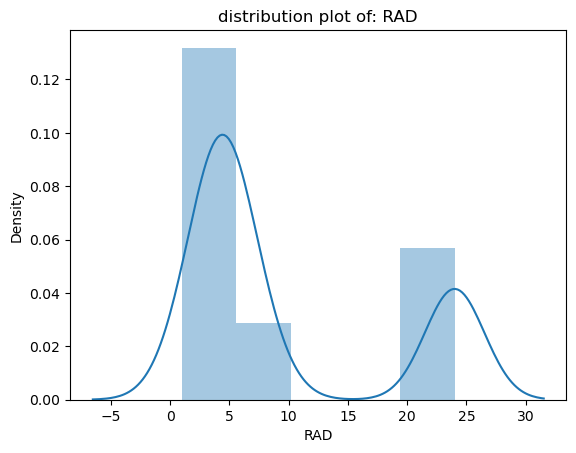

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


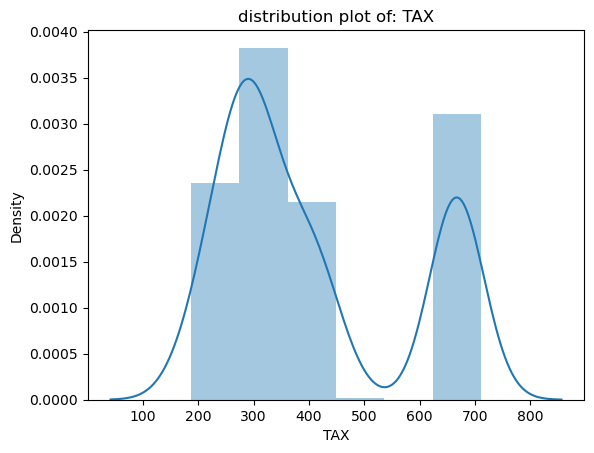

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


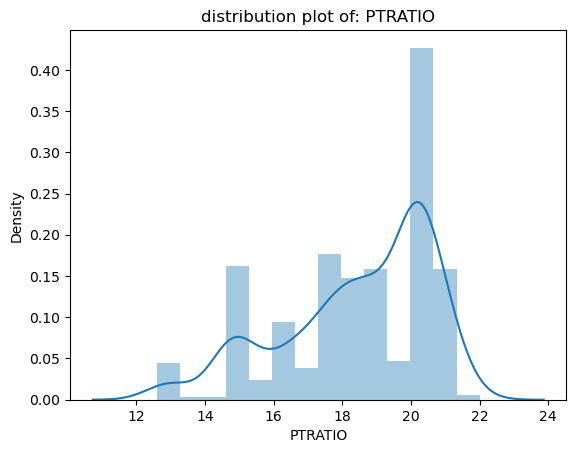

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


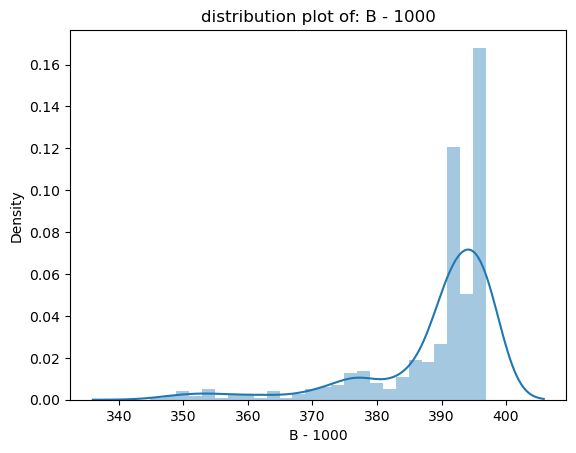

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


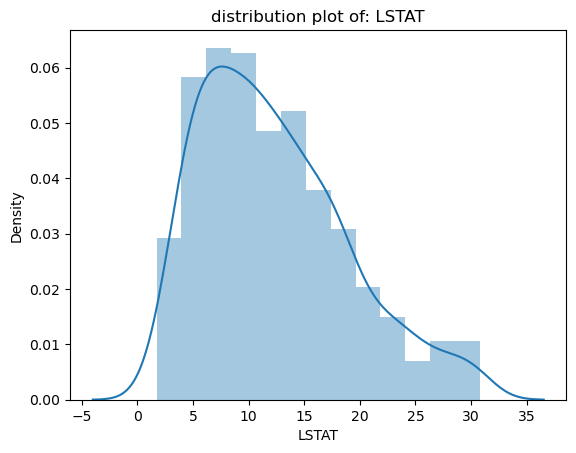

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


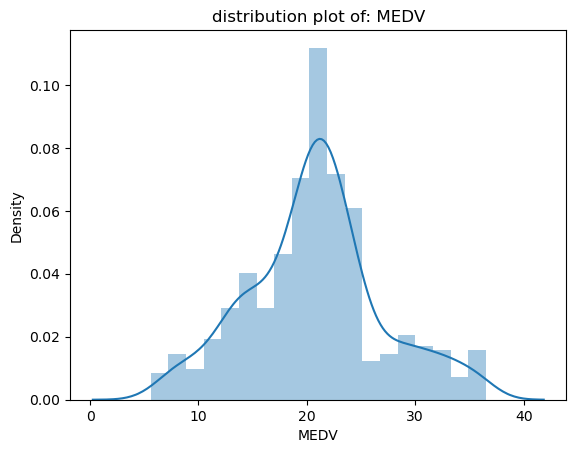

In [20]:
Distplot(Housing_Data)

### 3.6 Scaling Data 

#### Scaling tends to transform data into a specific range between 0 and 1 in the case of Min Max scaling for instance, while the true features values change however , scaling presere the inital relationships between features 

Usage: scaling is used when there are features with different ranges 
There are variaty of scaling methods: 
1. Min Max scaling: used by subtracting each feature from its minumum and divide by (xmax-xmin), ranges values from 0 to 1 
2. Standarad scaling: tends to centering the data since it subtacts each feature from its mean and divide by its SD and equalizing the impact f features and
can handle outliers




#### Since one can detect outliers in the plotted box plots, the standard scaling will be employeed in this case

 <a id="Home"></a>


[Return Home](#fHome)

<a id="fFDM"></a>

# **4. Fitting Regression Models**

#### 4.1 Introducing Model Accuracy Tests

1. Mean Squared Error (MSE) : meausres the average squared difference between the predicated values and the actual values the smaller the better where

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

2. Mean Absolute Error(MAE) : measures the average absolute diference between the predicted values and the actual value, the smaller the better where 

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

3. Coeffient of determination (R2): measures the total variability in the respone variable Y that is accounted for variations in the predictor variables Xs, if the R2 is near to 1, it implifes that Xs account for large variablity in the response variable Y. A summary measure to judge the fit of the linear model to a given body of the data. The larger the better 

$$
\text{R^2} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

4. Adjusted (R2): Since a large value of R2 doesnot necessairly mean that a model fits the data well; R2 Adjusted for giving a more realistic assessment. Adjusted R2 adjusts for the number of predictors in the data. it works as a kind of penality when the model contains more than needed junk Xs, the lag

$$
\text{Adjusted } R^2 = 1 - \frac{(1 - R^2) \cdot (n - 1)}{n - k - 1}
$$ 

Where K is the number of predictors



### Based on the correlation matrix, the data has a collinearlity problem that will lead to overfitting problem; therefore, the Reguralization concept will be introduced

<a id="Home"></a>


[Return Home](#fHome)

### 4.2 Regurlarization Concepts

#### Since there is a colllinerality between Xs predictors, a regularization techniques will be used to prevent overfitting by adding penality to the fitted regression model 
## Ridge Regression : employeed to address issues such as multicollinearlity and overfitting by adding penality term 
$$
J(\theta) = \text{MSE} + \alpha \sum_{i=1}^{n} \theta_i^2
$$

Where MSE 

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

$ J(\theta) \text{ is the Ridge regression cost function,} $
$ \text{MSE} \text{ is the Mean Squared Error,} $
$ \alpha \text{ is the regularization strength,} $
$ \theta_i \text{ are the regression coefficients,} $
$ n \text{ is the number of data points,} $
$ y_i \text{ is the true value of the response variable for the }i\text{-th data point,} $
$ \hat{y}_i \text{ is the predicted value of the response variable for the }i\text{-th data point.} $


#### Usage, the Ridge Regressuib is used when there are highly correlated predictore variables Xs since Ridge Regression tends to distrbute the weights among them rather than allocating the whole weight into a single variable 
#### By adding penality term, Ridge Regression tends to shrink the coefficients towards zeros



##  Lasso Regression: employeed to address issues such as multicollinearlity and overfitting by adding peanlity term

$$
J(\theta) = \text{MSE} + \alpha \sum_{i=1}^{n} |\theta_i|
$$

Where MSE
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


$ J(\theta) \text{ is the Ridge regression cost function,} $
$ \text{MSE} \text{ is the Mean Squared Error,} $
$ \alpha \text{ is the regularization strength,} $
$ \theta_i \text{ are the regression coefficients,} $
$ n \text{ is the number of data points,} $
$ y_i \text{ is the true value of the response variable for the }i\text{-th data point,} $
$ \hat{y}_i \text{ is the predicted value of the response variable for the }i\text{-th data point.} $

#### Usage, the Lasso Regression effectively perform feature selection, when there are many irrelavant redundant feature, the pernality term tends to shrink the coefficients to be exactly zeros 


## Elastic Net: employeed to combine both the L1 (Lasso) and L2 (Ridge). By the latter combination, elastic net model combines the benefits of Ridge and Lasso in the essence that it can handle multiclinearlity via Ridge and perform feature selection by setting some coefficients to be zero 

$$
\text{Elastic Net} = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \left( \lambda \sum_{j=1}^{p} |w_j| + (1 - \lambda) \frac{\lambda}{2} \sum_{j=1}^{p} w_j^2 \right)
$$



$ \alpha \text{is the overall regularization strength} $
$ \lambda \text{is the mixing parameter (balance between L1 and L2 regularization)} $

When $ \lambda $ is zero, the elastic net acts the same as Lassso Regression 
When $ \lambda $ is 1 , the elastic net acts the same as Ridge Regression




 <a id="Home"></a>


[Return Home](#fHome)

<a id="fModels_Into_Actions"></a>

# **5. Models Into Actions**

In the upcoming part

1. X variables will be determined and the Y variable will be seperated from the rest of the data 
2. Splitting the data into X_train, X_test, y_train and y_test
3. Sacling the data 
4. In the following part Simple liear regression will be fitted into the data, Higher degrees of polynomial regressoon, Ridge , Lasso, Elastic net and the 
Random Forest will be used 
5. For the usage of Regualarization terms, paramters tunning will be introduced, aiming for selecting the best alpha, lambda .
6. For the polynomia regression, a function for parameter tuning will be generated 
7. fitting each model through a combined function that fit the model based on the functions paramters 
8. Visualizing the resulted regression metrices accuracy tests
9. Combining all the resulted regression metrices accuracy tests into 1 data frame to finalize the ouctome

### 5.1 Setting X and y 

In [68]:
X = Housing_Data.drop('MEDV',axis=1)
y = Housing_Data["MEDV"]

### 5.2 Splitting the data into X train, X test, y train and y test

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### 5.3 Scaling Data 

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
scaler.fit(X_train) ## fitting the scaler into X train

StandardScaler()

In [73]:
X_train = scaler.transform(X_train)

In [74]:
X_test = scaler.transform(X_test) ## fitting the scaler into x test 

### 5.4 Tunning  Regression Hyper Paramters for Ridge, Lasso, Elastic Net

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

def tune_regression_model(X_train, y_train, model, param_grid, cv=5):
    """
    Performing parameter tunning for selecting the best alpha in the case Lasso, Ridge and selecting the 
    best alpha and lamda in the case of Elastic Net 
    """

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=cv)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    return best_params


In [76]:

ridge_param_grid = {'alpha': [0.1, 1.0, 10.0]}  
best_ridge_params = tune_regression_model(X_train, y_train, Ridge(), ridge_param_grid)


ridge_model = Ridge(**best_ridge_params)
ridge_model.fit(X_train, y_train)






Ridge()

In [77]:
lasso_param_grid = {'alpha': [0.1, 1.0, 10.0]} 
best_lasso_params = tune_regression_model(X_train, y_train, Lasso(), lasso_param_grid)


lasso_model = Lasso(**best_lasso_params)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [78]:
elastic_net_param_grid = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}

best_elastic_net_params = tune_regression_model(X_train, y_train, ElasticNet(), elastic_net_param_grid)


elastic_net_model = ElasticNet(**best_elastic_net_params)
elastic_net_model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9)

<a id="Home"></a>


[Return Home](#fHome)

### 5.5 Tunning for the selecting the optimum degree in case of fitting higher regression problem 

In [79]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression()
    model.fit(X_train_g,y_train_g)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train_g)
    test_pred = model.predict(X_test_g)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train_g,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test_g,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

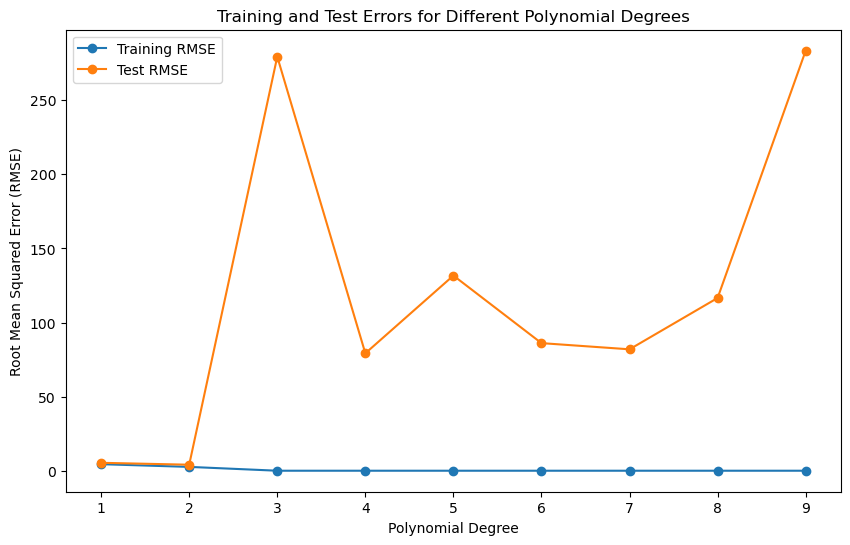

In [96]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), train_rmse_errors, label='Training RMSE', marker='o')
plt.plot(range(1, 10), test_rmse_errors, label='Test RMSE', marker='o')

plt.title('Training and Test Errors for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.show()


#### based on the above the training RMSE model is decreasing however, the testing RMSE increases after 2 and seems reasonable for selecting coplexity degree of 4, higher complexity than that implies we encounter overfitting problem 


### 5.6 Function for combing all the regression models 

In [80]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

def evaluate_regression_model(model, X_train, y_train, X_test, y_test, cv=5, degrees=None, alpha_range=None):
    """
    Evaluate a regression model using various metrics and cross-validation.

    Returns metries that holds all the models  test accuracy
    """

    metrics = {}

    if degrees is not None and degrees > 0:
        # Transform the input features into polynomial features
        poly_features = PolynomialFeatures(degree=degrees)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)

        # Train a linear regression model on the polynomial features
        model_poly = LinearRegression()
        model_poly.fit(X_train_poly, y_train)

        # Make predictions on the test set
        y_pred = model_poly.predict(X_test_poly)

    elif isinstance(model, RandomForestRegressor):
        # Random Forest Regressor
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    elif isinstance(model, Ridge):
        # Ridge Regression
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    
    elif isinstance(model, Lasso):
        # Ridge Regression
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    elif isinstance(model, ElasticNet):
        # Ridge Regression
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        # Fit the model without polynomial features
        model.fit(X_train, y_train)

        # Make predictions without polynomial features
        y_pred = model.predict(X_test)

    n = X_test.shape[0]
    k = X_test.shape[1]

    # Regression metrics
    metrics['Mean Absolute Error (MAE)'] = mean_absolute_error(y_test, y_pred)
    metrics['Mean Squared Error (MSE)'] = mean_squared_error(y_test, y_pred)
    metrics['Root Mean Squared Error (RMSE)'] = np.sqrt(metrics['Mean Squared Error (MSE)'])
    metrics['R-squared'] = r2_score(y_test, y_pred)
    metrics['R-squared-Adjusted'] = 1 - (1 - metrics['R-squared']) * (n - 1) / (n - k - 1)

    # Cross-validation scores
    cross_val_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
    metrics['Cross-Validation RMSE'] = np.sqrt(-cross_val_scores.mean())

    return metrics


1. Fiiting Simple linear Regression Model 

In [81]:
Simple_Linear_Regression_Metrices = evaluate_regression_model(Ridge(alpha=1.0),X_train,y_train,X_test,y_test,5,0)

2. Fitting Polynomial of Degree 2 

In [82]:

Ploynomial_degree_2_Metrices = evaluate_regression_model(LinearRegression(),X_train, y_train,X_test,y_test,5,2)

3. Fitting Polynomial of Degree 4

In [83]:
Ploynomial_degree_4_Metrices = evaluate_regression_model(LinearRegression(),X_train, y_train,X_test,y_test,5,4)

4. Fitting Ridge Regression based on the best alpha with 0.1 

In [84]:
Ridge_Regression_Metrices = evaluate_regression_model(Ridge(alpha = 0.1), X_train, y_train,X_test,y_test,5,0)

5. Fitting Lasso Regression based on the best alpha with 0.1 

In [85]:
Lasso_Regression_Metrices = evaluate_regression_model(Lasso(alpha = 0.1), X_train, y_train,X_test,y_test,5,0)

6. Fiitting Elastic Net Regression based on alpha of 0.1 and lamda of 0.9 

In [86]:
Elastic_Net_Regression_Metrices = evaluate_regression_model(ElasticNet(alpha = 0.1, l1_ratio=0.9), X_train, y_train,X_test,y_test,5,0)

7. Fiiting The Random Forest Regressor 

In [87]:
Random_Forest_Regressor_Model_Metrices = evaluate_regression_model(RandomForestRegressor(n_estimators=150, random_state=42),X_train,y_train,X_test,y_test,5,0)


### 5.7 Plotting the Regression Metrics

In [88]:
def plot_regression_metrics(metrics, title):
    """
    Plot regression metrics.

    Parameters:
    - metrics: Dictionary of regression metrics.
    - title: The title of the plot.
    """
    metrics_names = list(metrics.keys())
    metric_values = [metrics[name] for name in metrics_names]

    # Horizontal bar plot for metrics
    plt.figure(figsize=(8, 5))
    bars = plt.barh(metrics_names, metric_values, color='blue')

    # Add data labels next to each bar
    for bar, value in zip(bars, metric_values):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.4f}', ha='left', va='center')

    plt.title(title)
    plt.xlabel('Metric Value')
    plt.show()


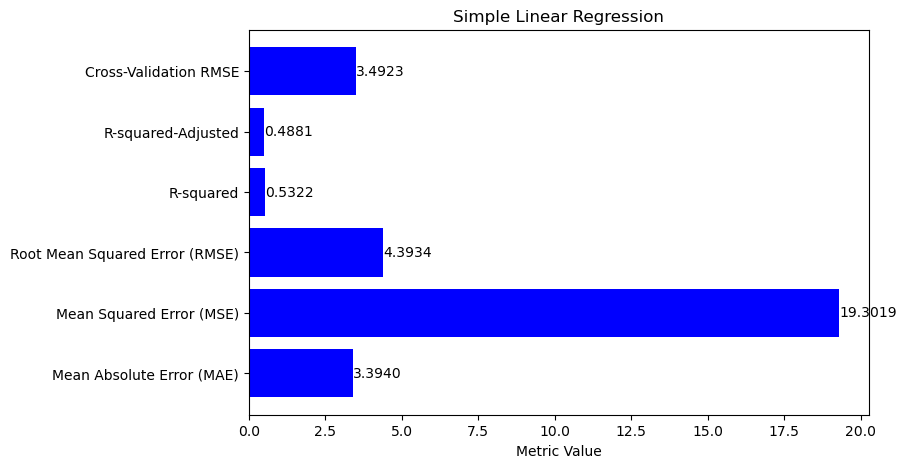

In [44]:
plot_regression_metrics( Simple_Linear_Regression_Metrices, "Simple Linear Regression")

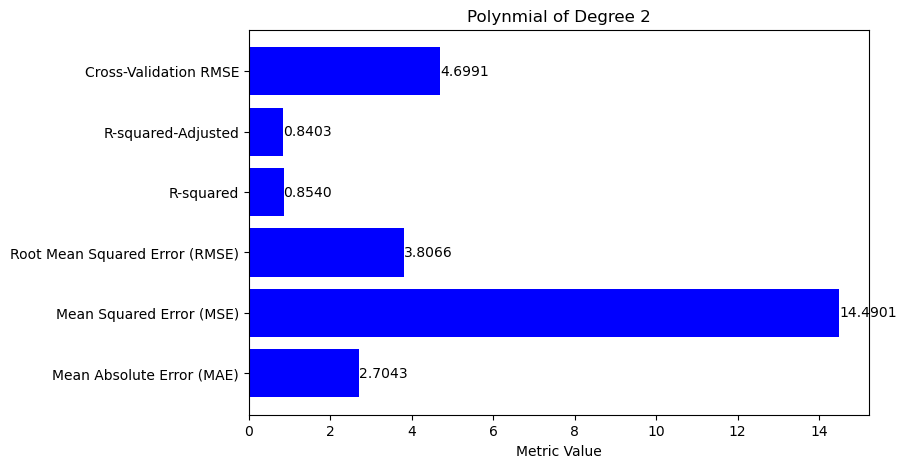

In [89]:
plot_regression_metrics( Ploynomial_degree_2_Metrices, "Polynmial of Degree 2")

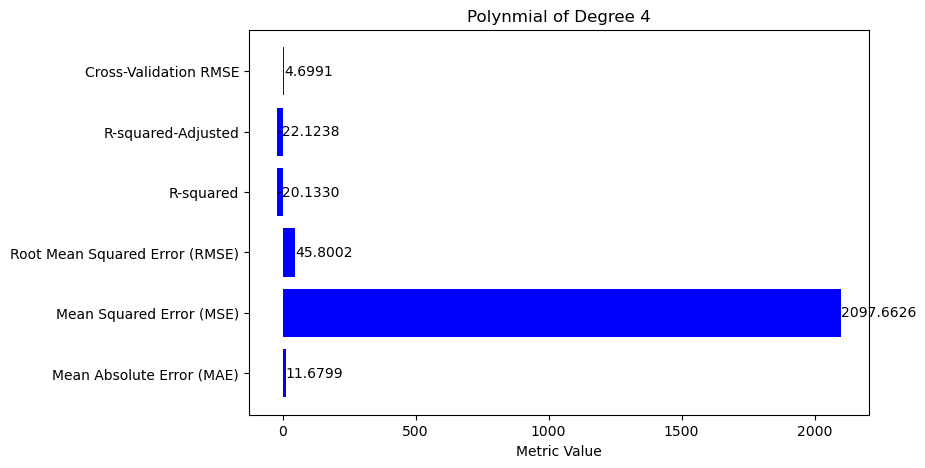

In [90]:
plot_regression_metrics(Ploynomial_degree_4_Metrices, "Polynmial of Degree 4")

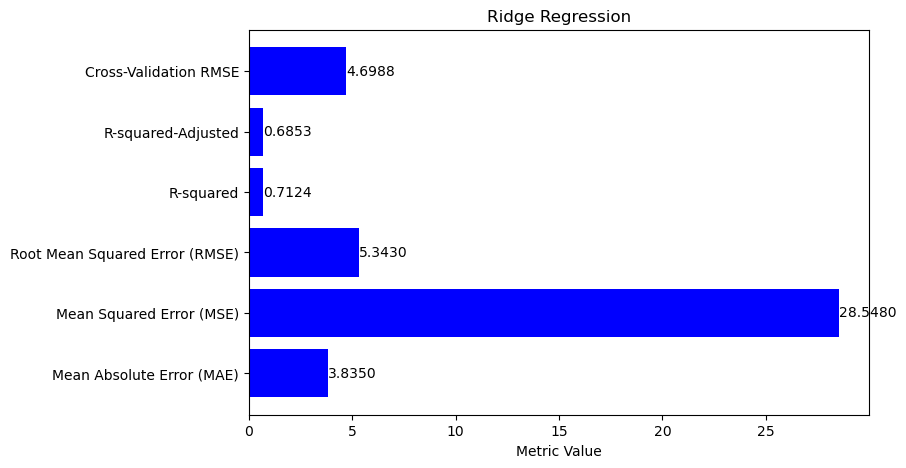

In [91]:
plot_regression_metrics(Ridge_Regression_Metrices, "Ridge Regression")

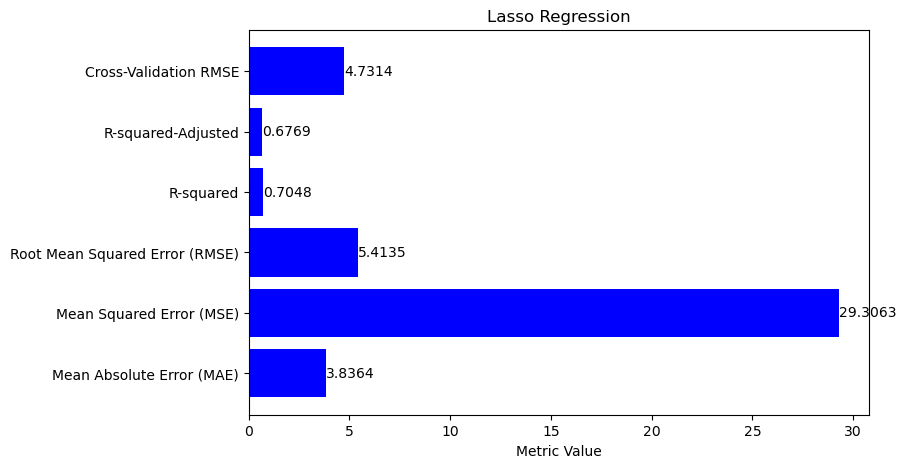

In [93]:
plot_regression_metrics(Lasso_Regression_Metrices, "Lasso Regression")

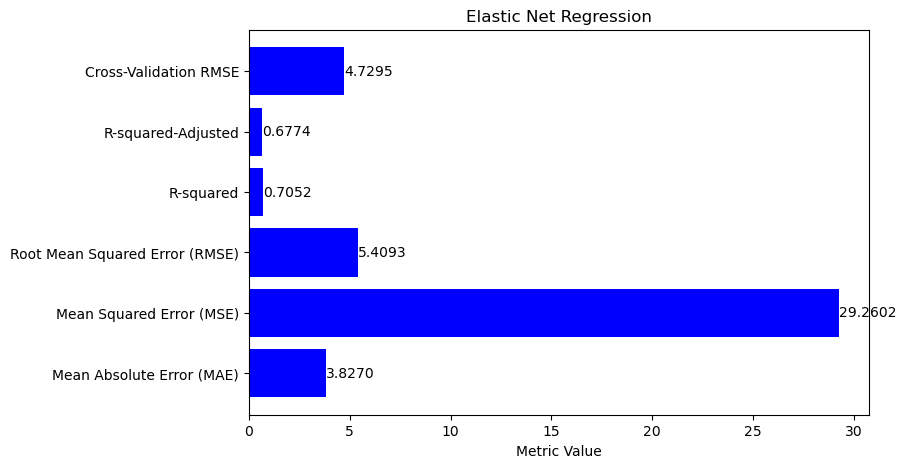

In [94]:
plot_regression_metrics(Elastic_Net_Regression_Metrices, "Elastic Net Regression")

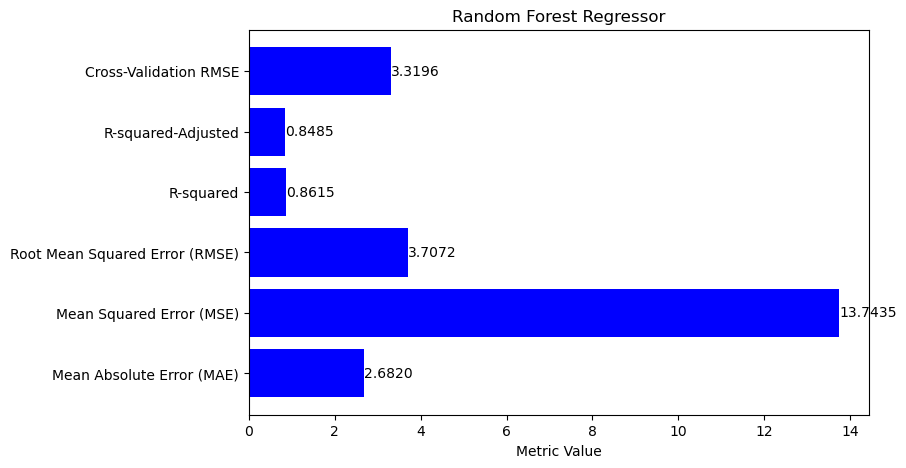

In [95]:
plot_regression_metrics(Random_Forest_Regressor_Model_Metrices, "Random Forest Regressor")

<a id="Home"></a>


[Return Home](#fHome)

### 5.8 Putting all the resulted metrices into a data frame 

In [96]:
df_linear_regression_metrics = pd.DataFrame.from_dict(Simple_Linear_Regression_Metrices, orient='index', columns=['Simple Linear Regression'])


In [97]:
df_poly_2 =  pd.DataFrame.from_dict(Ploynomial_degree_2_Metrices, orient='index', columns=['Polynmial of Degree 2'])

In [98]:
df_poly_4 = pd.DataFrame.from_dict(Ploynomial_degree_4_Metrices, orient='index', columns=['Polynmial of Degree 4'])

In [99]:
df_Ridge_Regression = pd.DataFrame.from_dict(Ridge_Regression_Metrices, orient='index', columns=['Ridge Regression'])

In [100]:
df_Lasso_Regression = pd.DataFrame.from_dict(Lasso_Regression_Metrices, orient='index', columns=['Lasso Regression'])

In [101]:
df_Elastic_Net = pd.DataFrame.from_dict(Elastic_Net_Regression_Metrices, orient='index', columns=['Elastic Net Regression '])

In [102]:
df_Random_forest = pd.DataFrame.from_dict(Random_Forest_Regressor_Model_Metrices, orient='index', columns=['Random Forest Regressor'])

In [103]:
All_Models_Metrices_Combined = pd.concat([df_linear_regression_metrics, df_poly_2,df_poly_4, 
                                         df_Ridge_Regression, 
                                         df_Lasso_Regression, 
                                         df_Elastic_Net, 
                                         df_Random_forest], axis=1)
All_Models_Metrices_Combined

,Simple Linear Regression,Polynmial of Degree 2,Polynmial of Degree 4,Ridge Regression,Lasso Regression,Elastic Net Regression,Random Forest Regressor
Mean Absolute Error (MAE),3.829284,2.704349,11.679866,3.835043,3.836369,3.826963,2.682039
Mean Squared Error (MSE),28.552118,14.490142,2097.662649,28.547956,29.306299,29.260167,13.743513
Root Mean Squared Error (RMSE),5.343418,3.806592,45.800247,5.343029,5.413529,5.409267,3.707224
R-squared,0.712351,0.854019,-20.132977,0.712393,0.704753,0.705217,0.861540
R-squared-Adjusted,0.685253,0.840267,-22.123765,0.685299,0.676939,0.677448,0.848497
Cross-Validation RMSE,4.696719,4.699078,4.699078,4.698806,4.731365,4.729542,3.319643


### Based on the above the optimum models with higher test accuracy and both R2 and Adjusted R2 are close to each other are Randome Forest and polynomial of Degree 2

<a id="Home"></a>


[Return Home](#fHome)